# Introduction to Data Science - Homework 3
*COMP 5360 / MATH 4100, University of Utah, http://datasciencecourse.net/*

Due: Friday, January 30, 11:59pm.

In this homework you will read in and analyze a games dataset. First we'll do some basic analysis with vanilla Python, then we'll move on to doing more advanced analysis with [Pandas](http://pandas.pydata.org/pandas-docs/stable). 


## Your Data
Fill out the following information: 

*First Name:*   Abby(Yichun)
*Last Name:*   Chen
*E-mail:*   u1583033@utah.edu
*UID:*  u1583033


In [1]:
# imports
import csv
import pandas as pd
import matplotlib.pyplot as plt
plt.style.use('ggplot')
%matplotlib inline

## Part 1: Analyzing Data The Basic Way

In this part we'll do some manual analysis of an Iphone Strategy Games dataset.

### Task 1.1: Read in the data

Parse the file [games.csv](games.csv) using the [csv library](https://docs.python.org/3/library/csv.html). Lecture 6 and might be a good inspiration for this. 

We recommend that you store the header in a separate array. Make sure that at least the "Rating" and the "Number of Ratings" columns are cast to the appropriate data types for doing calculations with them. 

Print the header, the number of rows and columns, and Row 50 of the table.

In [2]:
# initialize the top-level array
with open("games.csv", newline="") as games:
    # read header
    reader = csv.reader(games)
    header = next(reader)

    # getting idx for further calculation
    rating_idx = header.index("Rating")
    num_ratings_idx = header.index("Number of Ratings")
    price_idx = header.index("Price")

    rows = []

    # read and process each row
    for row in reader:
        # convert price col 
        row[rating_idx] = float(row[rating_idx])
        row[num_ratings_idx] = int(row[num_ratings_idx])
        if row[price_idx] == "Free":
            row[price_idx] = 0.0
        else:
            row[price_idx] = row[price_idx].replace("$", "")
            row[price_idx] = float(row[price_idx])
        rows.append(row)

print("Header: ", header)
print("Number of rows: ",len(rows))
print("Number of columns: ", len(header))
print("Row 50: ",rows[49])



Header:  ['App Name', 'App ID', 'Price', 'Rating', 'Number of Ratings', 'Developer', 'Size', 'Minimum OS Version', 'Content Rating', 'Genre', 'Year']
Number of rows:  15668
Number of columns:  11
Row 50:  ['World of Tanks Blitz™', '859204347', 0.0, 4.61428, 127265, 'WARGAMING Group Limited', '3992943616', '12', '12+', 'Strategy', '2014']


### Task 1.2:  Calculate game stats

In this task, you will calculate some statistics about games. We suggest you implement your solutions for Tasks 1.2.1-1.2.3 in one code cell – you should be able to calculate this in a single iteration over the dataset.

#### Task 1.2.1 Calcualte average ratings
Compute the average rating for all games and print the output and total. Your output could look like this:
    
    Average rating: xxx.xxxx, Total games: xx

#### Task 1.2.2: Calculate average rating for major games

Compute the average rating for the games that have more than 200 ratings in your loaded dataset and print the output. (We'll call these games with more than 200 ratings major games from now on).

Your output could look like this:
    
    Average rating for major games: xxx.xxxx, Total major games: xx

#### Task 1.2.3: Find the highest and the lowest rated major games, and determine how many ratings they have

Determine which major game has the highest rating and which has the lowest rating.

Your output could look like this:
    
    Highest rating: xxx.xxxx, Title: GAME TITLE, Number of Ratings: xxxx 
    Lowest rating: xxx.xxxx, Title: GAME TITLE, Number of Ratings: xxxx 
 
#### Task 1.2.4: Interpret the data
 * What's the rating relationship of major games to all games?
 * Are major games typically better than the average of all games?
 * Are particular genres rated higher than others?

In [3]:
# Solution
import math
from collections import Counter

sum_rating = 0
sum_major_rating = 0
major_count = 0
highest_row = None
lowest_row = None
highest_rating = -math.inf
lowest_rating = math.inf
genre_list = []

for row in rows:
    sum_rating += row[rating_idx]
    if row[num_ratings_idx] > 200:
        genre_list.append(row[9])
        sum_major_rating += row[rating_idx]
        major_count += 1
        if row[rating_idx] > highest_rating:
            highest_rating = row[rating_idx]
            highest_row = row
        if row[rating_idx] < lowest_rating:
            lowest_rating = row[rating_idx]
            lowest_row = row

print(f"Average of rating: {sum_rating/len(rows)}, Total Games: {len(rows)}")
print(f"Average of major games rating: {sum_major_rating/major_count}, Total major games: {major_count}")
print(f"Highest Rating: {highest_row[3]}, Title: {highest_row[0]}, Number of Ratings: {highest_row[4]}")
print(f"Lowest Rating: {lowest_row[3]}, Title: {lowest_row[0]}, Number of Ratings: {lowest_row[4]}")

genre_count = Counter(genre_list)

print(genre_count)



Average of rating: 2.8902173110799176, Total Games: 15668
Average of major games rating: 4.506593926448736, Total major games: 2692
Highest Rating: 4.99162, Title: Crazy Rolling Hero, Number of Ratings: 358
Lowest Rating: 1.58894, Title: Three Kingdoms Killing, Number of Ratings: 995
Counter({'Strategy': 1182, 'Entertainment': 361, 'Simulation': 323, 'Role Playing': 178, 'Action': 137, 'Casual': 95, 'Puzzle': 95, 'Board': 75, 'Card': 64, 'Adventure': 38, 'Sports': 27, 'Family': 27, 'Education': 21, 'Social Networking': 12, 'Games': 12, 'Lifestyle': 9, 'Music': 6, 'Finance': 4, 'Racing': 4, 'Word': 4, 'Business': 4, 'Utilities': 3, 'Travel': 2, 'Trivia': 2, 'Health & Fitness': 2, 'Food & Drink': 2, 'Casino': 1, 'Books': 1, 'Graphics & Design': 1})


**Your Interpretation**: TODO

Aroung 1/7 of the total games are major games. On average, the majors games has a much higher ratings compared to the average of all the games. I counted each genre within the major games lists. Strategy games are by far the most popular one among al the major games. 

## Part 2: Pandas

In this part we will use the [Pandas library](http://pandas.pydata.org/pandas-docs/stable) for our analysis.

### Task 2.1: Loading data

Read in the data again. This time you should create a [Pandas DataFrame](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.html). Print the head of the dataset. 
 * How many data rows did you load? How many columns?
 * Of which data types are the columns? 
 * Do you have to do manual data type conversions?

In [39]:
# your code goes here
games = pd.read_csv("games.csv")
print(len(games)) # number of rows
print(len(games.columns)) # num of col
games["Price"] = games["Price"].astype(str) # everything becomes string
games["Price"] = games["Price"].replace("Free", "0") 
games["Price"] = games["Price"].str.replace("$","").astype(float)

# Price column needs to be changed becuase it's all strings instead of floats or 
# int which is required later for calculation

games.head()
print(games.dtypes)

15668
11
App Name               object
App ID                  int64
Price                 float64
Rating                float64
Number of Ratings       int64
Developer              object
Size                    int64
Minimum OS Version     object
Content Rating         object
Genre                  object
Year                    int64
dtype: object


**Your Interpretation**: TODO

### Task 2.2: Calculate the average rating

Compute the average rating and price (rounded to the nearest cent) for all games and print the output and total. Your output could look like this:
    
    Average rating: xxx.xxxx, Average price: xx.xx, Total games: xx

In [5]:
# your code goes here
import numpy as np

avg_rating = np.mean(games["Rating"])
avg_price = np.mean(games["Price"])
total_games = len(games["App Name"])

print(f"Average rating: {round(avg_rating,4)}, Average price: {round(avg_price,2)}, Total games: {total_games}")

Average rating: 2.8902, Average price: 0.45, Total games: 15668


### Task 2.3: Compare the runtime

We want to measure how long it takes to calculate the average using Pandas versus using a for loop (you can copy the relevant parts from Task 1). This is a fast calculation, so running once is not enough. Instead, run both calcuations 1000 times (in a loop) and measure the time for the entire loop.

To measure, use [time.process_time()](https://docs.python.org/3/library/time.html#time.process_time) to collect timestamps before and after the loop. The total time is the difference between those timestamps.

Print your results in a human readable way and add a metric to the output. Calculate the factor of the difference and print it. Note that the exact times and the factors will vary when you re-run this and especially between machines. 

E.g.:  
 Time the Part 1 way: xxx.xxx s\
 Time using Pandas: xxx.xxx s\
 Difference factor: xxx
    
Interpret the results. Is this difference substantial?     

In [6]:
import time
# your code goes here

# part 1 time:
sum_rating = 0 
part_1_start = time.process_time()
for i in range(1000):
    sum_rating = 0
    for row in rows:
    # index for the rating and num of rating
    # adding to the sum of rating
        sum_rating += row[rating_idx]
    avg_rating = sum_rating/len(rows)
part_1_rt = time.process_time() - part_1_start
print(f"Time using the Part 1 way: {part_1_rt}s")


pd_start = time.process_time()
for i in range(1000):
    avg_rating = np.mean(games["Rating"])
pd_rt = time.process_time() - pd_start
print(f"Time using Pandas: {pd_rt}s")

print(f"Difference factor: {part_1_rt/pd_rt}s")
    


    

Time using the Part 1 way: 2.046875s
Time using Pandas: 0.046875s
Difference factor: 43.666666666666664s


**Your Interpretation**: TODO

The results what I thought looking at the code. Part 1 needed two for loops in order to do the job, that will increase the runtime overall for the program compared to the pandas methods with only one for loops. Using Pandas to extact the values directly and using numpy to help with the math, the program was able to run 36 times faster than the iteration(part1) way.

### Task 2.4: Filter out Rows

The whole games dataset has about 15,000 games. Use pandas to filter your dataframe to contain only the major games. Then print the total.

E.g.:
    xxx.xxx games have more than 200 ratings.

In [7]:
# your code goes here
major_games = games.loc[games["Number of Ratings"] > 200]
print(f"{len(major_games)} games have more than 200 ratings.")

2692 games have more than 200 ratings.


### Task 2.5: Calculate the average rating and price for major games

Compute the average rating and price (rounded to the nearest cent) for the major games.
Your output could look like this:
    
    Average rating of major games: xxxx.xxx, Average price of major games: xxx.xx

In [8]:
# your code goes here
major_games_rating = np.mean(major_games["Rating"])
major_games_price = np.mean(major_games["Price"])

print(f"Average rating of major games: {round(major_games_rating,3)}, Average price of major games: {round(major_games_price,2)}")

Average rating of major games: 4.507, Average price of major games: 0.42


### Task 2.6: Find the highest and lowest rated major games

Find the highest rated major game and the lowest major game in the dataframe. Hint: [idxmax()](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.Series.idxmax.html) and [idxmin()](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.Series.idxmin.html) could be helpful, or you could sort by rating and retrieve the first element.

Print the title and the rating.

Your output could look like this:
    
    Highest rated game: TITLE, rating: x.x
    Lowest rated game: TITLE, rating: x.x


In [9]:
# your code goes here
max_rate_idx = major_games["Rating"].idxmax()
min_rate_idx = major_games["Rating"].idxmin()

print(f"Highest rated game: {games["App Name"][max_rate_idx]}, ratings: {games["Rating"][max_rate_idx]}")
print(f"Lowest rated game: {games["App Name"][min_rate_idx]}, ratings: {games["Rating"][min_rate_idx]}")




Highest rated game: Crazy Rolling Hero, ratings: 4.99162
Lowest rated game: Three Kingdoms Killing, ratings: 1.58894


### Task 2.7: Create genre subset frames

From the major games you filtered out in a previous task, find out 
 * How many are Action.
 * How many are Adventure.
 * How many are both Action and Adventure.
 
Create new dataframes for each of these subsets.

Hint: you can combine broadcasting statements with a boolean and using the `&` operator.

Print the results, e.g.:  

    xxx.xxx major games are Action.
    xxx.xxx major games are Adventure .
    xxx.xxx major games are both, Action and Adventure.

In [10]:
# your code goes here
action_games = major_games[major_games["Genre"] == "Action"]
print(f"{len(action_games)} major games are Action.")

adventure_games = major_games[major_games["Genre"] == "Adventure"]
print(f"{len(adventure_games)} major games are Adventure.")

action_and_adv = major_games[(major_games["Genre"] == "Action") & (major_games["Genre"] == "Adventure")]
print(f"{len(action_and_adv)} major games are both, Action and Adventure.")




137 major games are Action.
38 major games are Adventure.
0 major games are both, Action and Adventure.


### Task 2.8: Compare ratings of different categories

Now we want to compare the ratings for Action and Adventure among the major games.

Compute the average rating, maximum rating, minimum rating, standard deviation, and the median for each category. Hint: there is a function that does all of this in one line. 

What do these numbers tell us? Provide an interpretation.

In [11]:
# your code goes here
action_games.describe()


,App ID,Price,Rating,Number of Ratings,Size,Year
count,1.370000e+02,137.000000,137.000000,1.370000e+02,1.370000e+02,137.000000
mean,1.868702e+09,0.539051,4.467734,4.446062e+04,5.228068e+08,2018.343066
std,1.773925e+09,2.314774,0.364884,2.552976e+05,7.036576e+08,3.577787
min,3.487951e+08,0.000000,2.567040,2.040000e+02,1.939251e+07,2010.000000
25%,1.050974e+09,0.000000,4.333760,6.370000e+02,1.538427e+08,2016.000000
50%,1.365647e+09,0.000000,4.558680,1.877000e+03,2.556324e+08,2018.000000
75%,1.584093e+09,0.000000,4.697280,9.881000e+03,5.759560e+08,2021.000000
max,6.717579e+09,19.990000,4.897910,2.571858e+06,3.933245e+09,2024.000000


In [12]:
len(adventure_games)
adventure_games.describe()

,App ID,Price,Rating,Number of Ratings,Size,Year
count,3.800000e+01,38.000000,38.000000,38.000000,3.800000e+01,38.000000
mean,2.123967e+09,0.393947,4.418819,16078.973684,3.162010e+08,2018.105263
std,2.116791e+09,1.495967,0.372384,69813.324169,3.745639e+08,3.944133
min,4.572647e+08,0.000000,2.782920,201.000000,9.358336e+06,2011.000000
25%,9.968867e+08,0.000000,4.269312,321.750000,9.541914e+07,2015.000000
50%,1.294716e+09,0.000000,4.476810,821.500000,2.068055e+08,2017.500000
75%,1.585207e+09,0.000000,4.668415,2486.000000,3.531254e+08,2021.750000
max,6.502289e+09,7.990000,4.864200,426971.000000,1.659989e+09,2024.000000


**Your Interpretation**: TODO

The price for actions are silghtly more expensive compared to the adventure games with hier variance. The most expensive action game is almost twice more expensive than the most expensive adventure games. The range of rating between tow types of games are similar. The actions games having a higher average rating could be contribute to the larger total samples. 

### Task 2.9: Major games over time

Calculate how many major games in this dataset were made in each year.

Print the number like this, sorted by year:

    year   number of games
    2008    xxx
    2009    xxx
    ...     ...

Use this data to render a line chart of the number of games per year.

In [30]:
# your code goes here
num_over_the_year = major_games["Year"].value_counts().reset_index()
num_over_the_year.columns = ["Year", "number of games"]
sorted_num_over_year = num_over_the_year.sort_values(by="Year", ascending=True)

sorted_num_over_year

,Year,number of games
16,2008,5
15,2009,30
14,2010,35
13,2011,39
12,2012,76
11,2013,108
10,2014,111
9,2015,159
6,2016,229
5,2017,232


Text(0.5, 1.0, 'Number of Games Purchased Each Year')

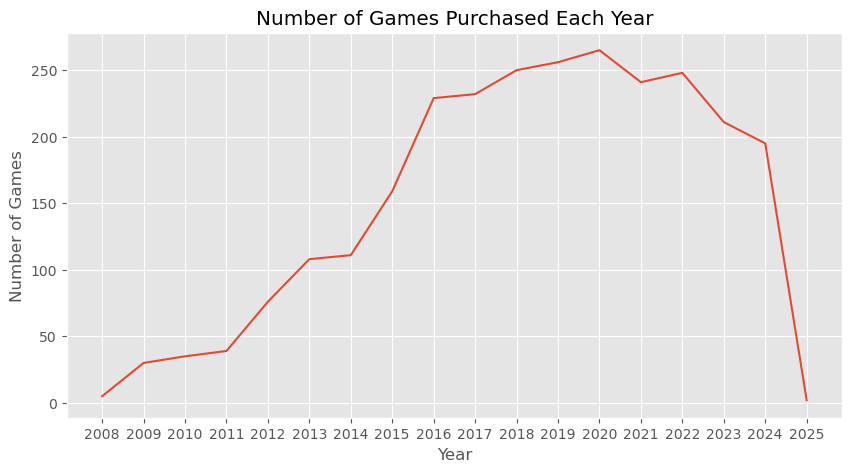

In [14]:
# create the plot here
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 5)) 
y = sorted_num_over_year["number of games"]
X = sorted_num_over_year["year"]
plt.plot(X,y)
plt.xlabel("Year")
plt.xticks(X)# remove the decimal in the X axis
plt.ylabel("Number of Games")
plt.title("Number of Games Purchased Each Year")

### Task 2.10: Yearly average

Compute the average rating per year for all major games.\
Use the numbers you computed to plot a line chart. Plot the year on x-axis and the average rating on y-axis.  

In [ ]:
# your code goes here

# calculate the total number of games per year
total_per_year = major_games.groupby("Year")["Rating"].sum().reset_index()
combine_year_stats = pd.merge(total_per_year, num_over_the_year, on="Year")

# calculating the average games per year
combine_year_stats["avg_rating_per_year"] = combine_year_stats["Rating"]/combine_year_stats["number of games"]


,Year,Rating,number of games,avg_rating_per_year
0,2008,22.80184,5,4.560368
1,2009,130.47118,30,4.349039
2,2010,151.29441,35,4.322697
3,2011,175.33252,39,4.495706
4,2012,336.26350,76,4.424520
5,2013,472.86483,108,4.378378
6,2014,490.91413,111,4.422650
7,2015,702.66623,159,4.419284
8,2016,1014.80125,229,4.431447
9,2017,1033.16682,232,4.453305


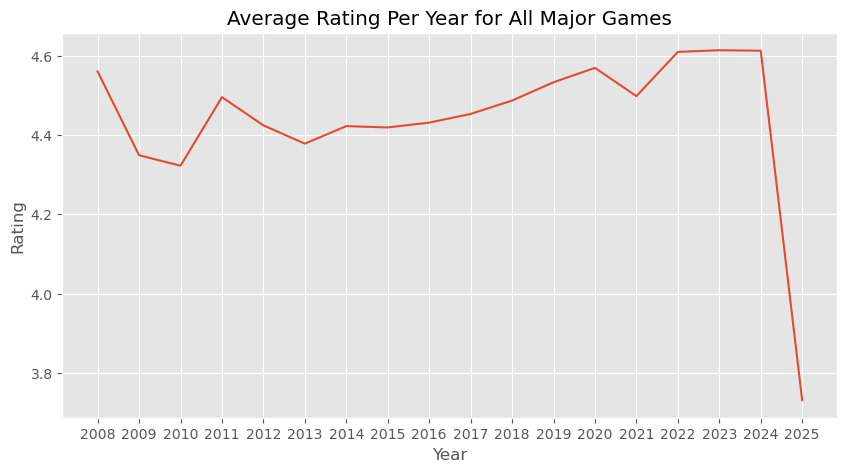

In [38]:
plt.figure(figsize=(10,5))
y = combine_year_stats["avg_rating_per_year"]
X = combine_year_stats["Year"]
plt.plot(X,y)
plt.xticks(X)
plt.xlabel("Year")
plt.ylabel("Rating")
plt.title("Average Rating Per Year for All Major Games")
plt.show()

### Task 2.11: Free vs Paid

Compare free games against paid games.\
Calculate the average rating and number of ratings between free and paid games. Create a metric to determine popularity using at least these two inputs. Compare the popularity of free games against paid games in each genre using your metric.

In [58]:
# your code goes here

# free game Vs. Paid Games

free_game = games.loc[games["Price"] == float(0)]
paid_game = games.loc[games["Price"] != float(0)]
# free_game_popularity
free_game_genre_stat = free_game.groupby("Genre").agg(
    avg_rating = ("Rating","mean"),
    avg_number_ratings = ("Number of Ratings", "mean")
)

free_game_genre_stat["popularity"] = free_game_genre_stat["avg_rating"]*np.log(free_game_genre_stat["avg_number_ratings"]+1)
free_game_genre_stat.head(10)
# paid_game_popularity 

paid_game_genre_stat = paid_game.groupby("Genre").agg(
    avg_rating = ("Rating","mean"),
    avg_number_ratings = ("Number of Ratings", "mean")
)

paid_game_genre_stat["popularity"] = paid_game_genre_stat["avg_rating"]*np.log(paid_game_genre_stat["avg_number_ratings"]+1)
paid_game_genre_stat.head(10)


,avg_rating,avg_number_ratings,popularity
Genre,,,
Action,3.072614,2318.016393,23.809376
Adventure,3.823445,109.120000,17.976196
Animals & Nature,0.000000,0.000000,0.000000
Board,2.963794,269.761905,16.600922
Business,1.500000,1.000000,1.039721
Card,3.246886,334.178571,18.879552
Casino,4.250000,1.000000,2.945876
Casual,2.462765,44.743590,9.415276
Education,2.783407,940.777778,19.060129


### Task 2.12: Explore and Interpret

Why is there so much spread (zig-zag) in the number of ratings in earlier years?

Is 200 ratings a good threshold for the title 'major' games? 

Continue to explore and use plots to inform your answer. Interesting measures to consider are the total number of ratings per year, the average number of ratings for a game in a particular year, etc. 

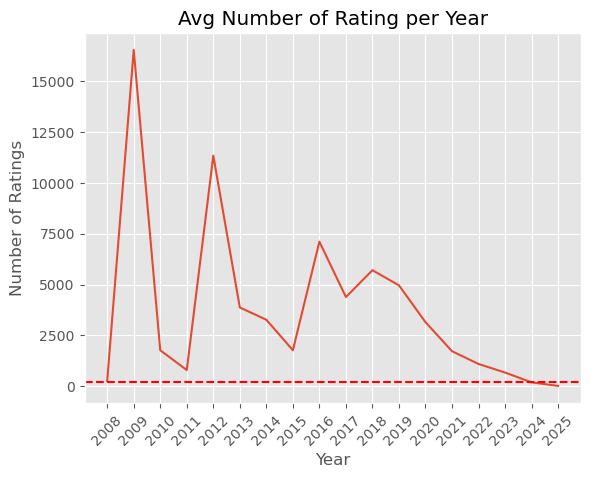

In [92]:
# your code goes here
num_of_rating = games.groupby("Year").agg(
    total_rating = ("Number of Ratings","mean")
).reset_index()

X = num_of_rating["Year"]
y = num_of_rating["total_rating"]
plt.Figure(figsize=(12,6))
plt.plot(X,y)
plt.axhline(y=200, color='red', linestyle='--', label='Threshold 200')
plt.xticks(X, rotation=45)
plt.xlabel("Year")
plt.ylabel("Number of Ratings")
plt.title("Avg Number of Rating per Year")
plt.show()

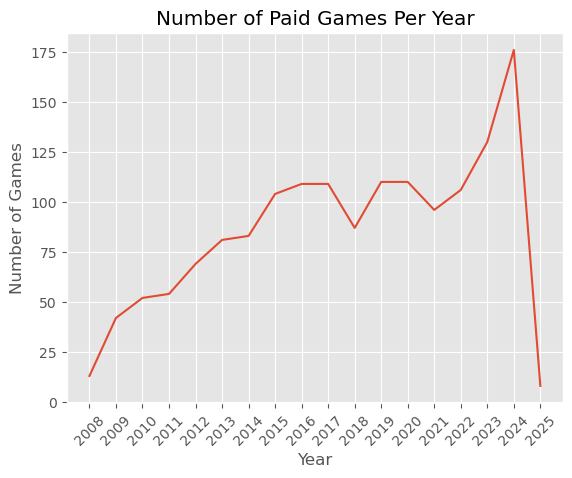

In [89]:
# Number of paid games per year
paid_game_per_year = paid_game.groupby("Year").size().reset_index()
paid_game_per_year.columns = ["Year", "Paid Games"]
paid_game_per_year = paid_game_per_year.sort_values(by="Year")
paid_game_per_year

X = paid_game_per_year["Year"]
y = paid_game_per_year["Paid Games"]
plt.Figure(figsize=(12,6))
plt.plot(X,y)
plt.xticks(X, rotation=45)
plt.xlabel("Year")
plt.ylabel("Number of Games")
plt.title("Number of Paid Games Per Year")
plt.show()


c:\Users\abbyc\miniconda3\envs\viz\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 20116 (\N{CJK UNIFIED IDEOGRAPH-4E94}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
c:\Users\abbyc\miniconda3\envs\viz\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 23376 (\N{CJK UNIFIED IDEOGRAPH-5B50}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
c:\Users\abbyc\miniconda3\envs\viz\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 26827 (\N{CJK UNIFIED IDEOGRAPH-68CB}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
c:\Users\abbyc\miniconda3\envs\viz\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 30446 (\N{CJK UNIFIED IDEOGRAPH-76EE}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
c:\Users\abbyc\miniconda3\envs\viz\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 20006 (\N{CJK UNIFIE

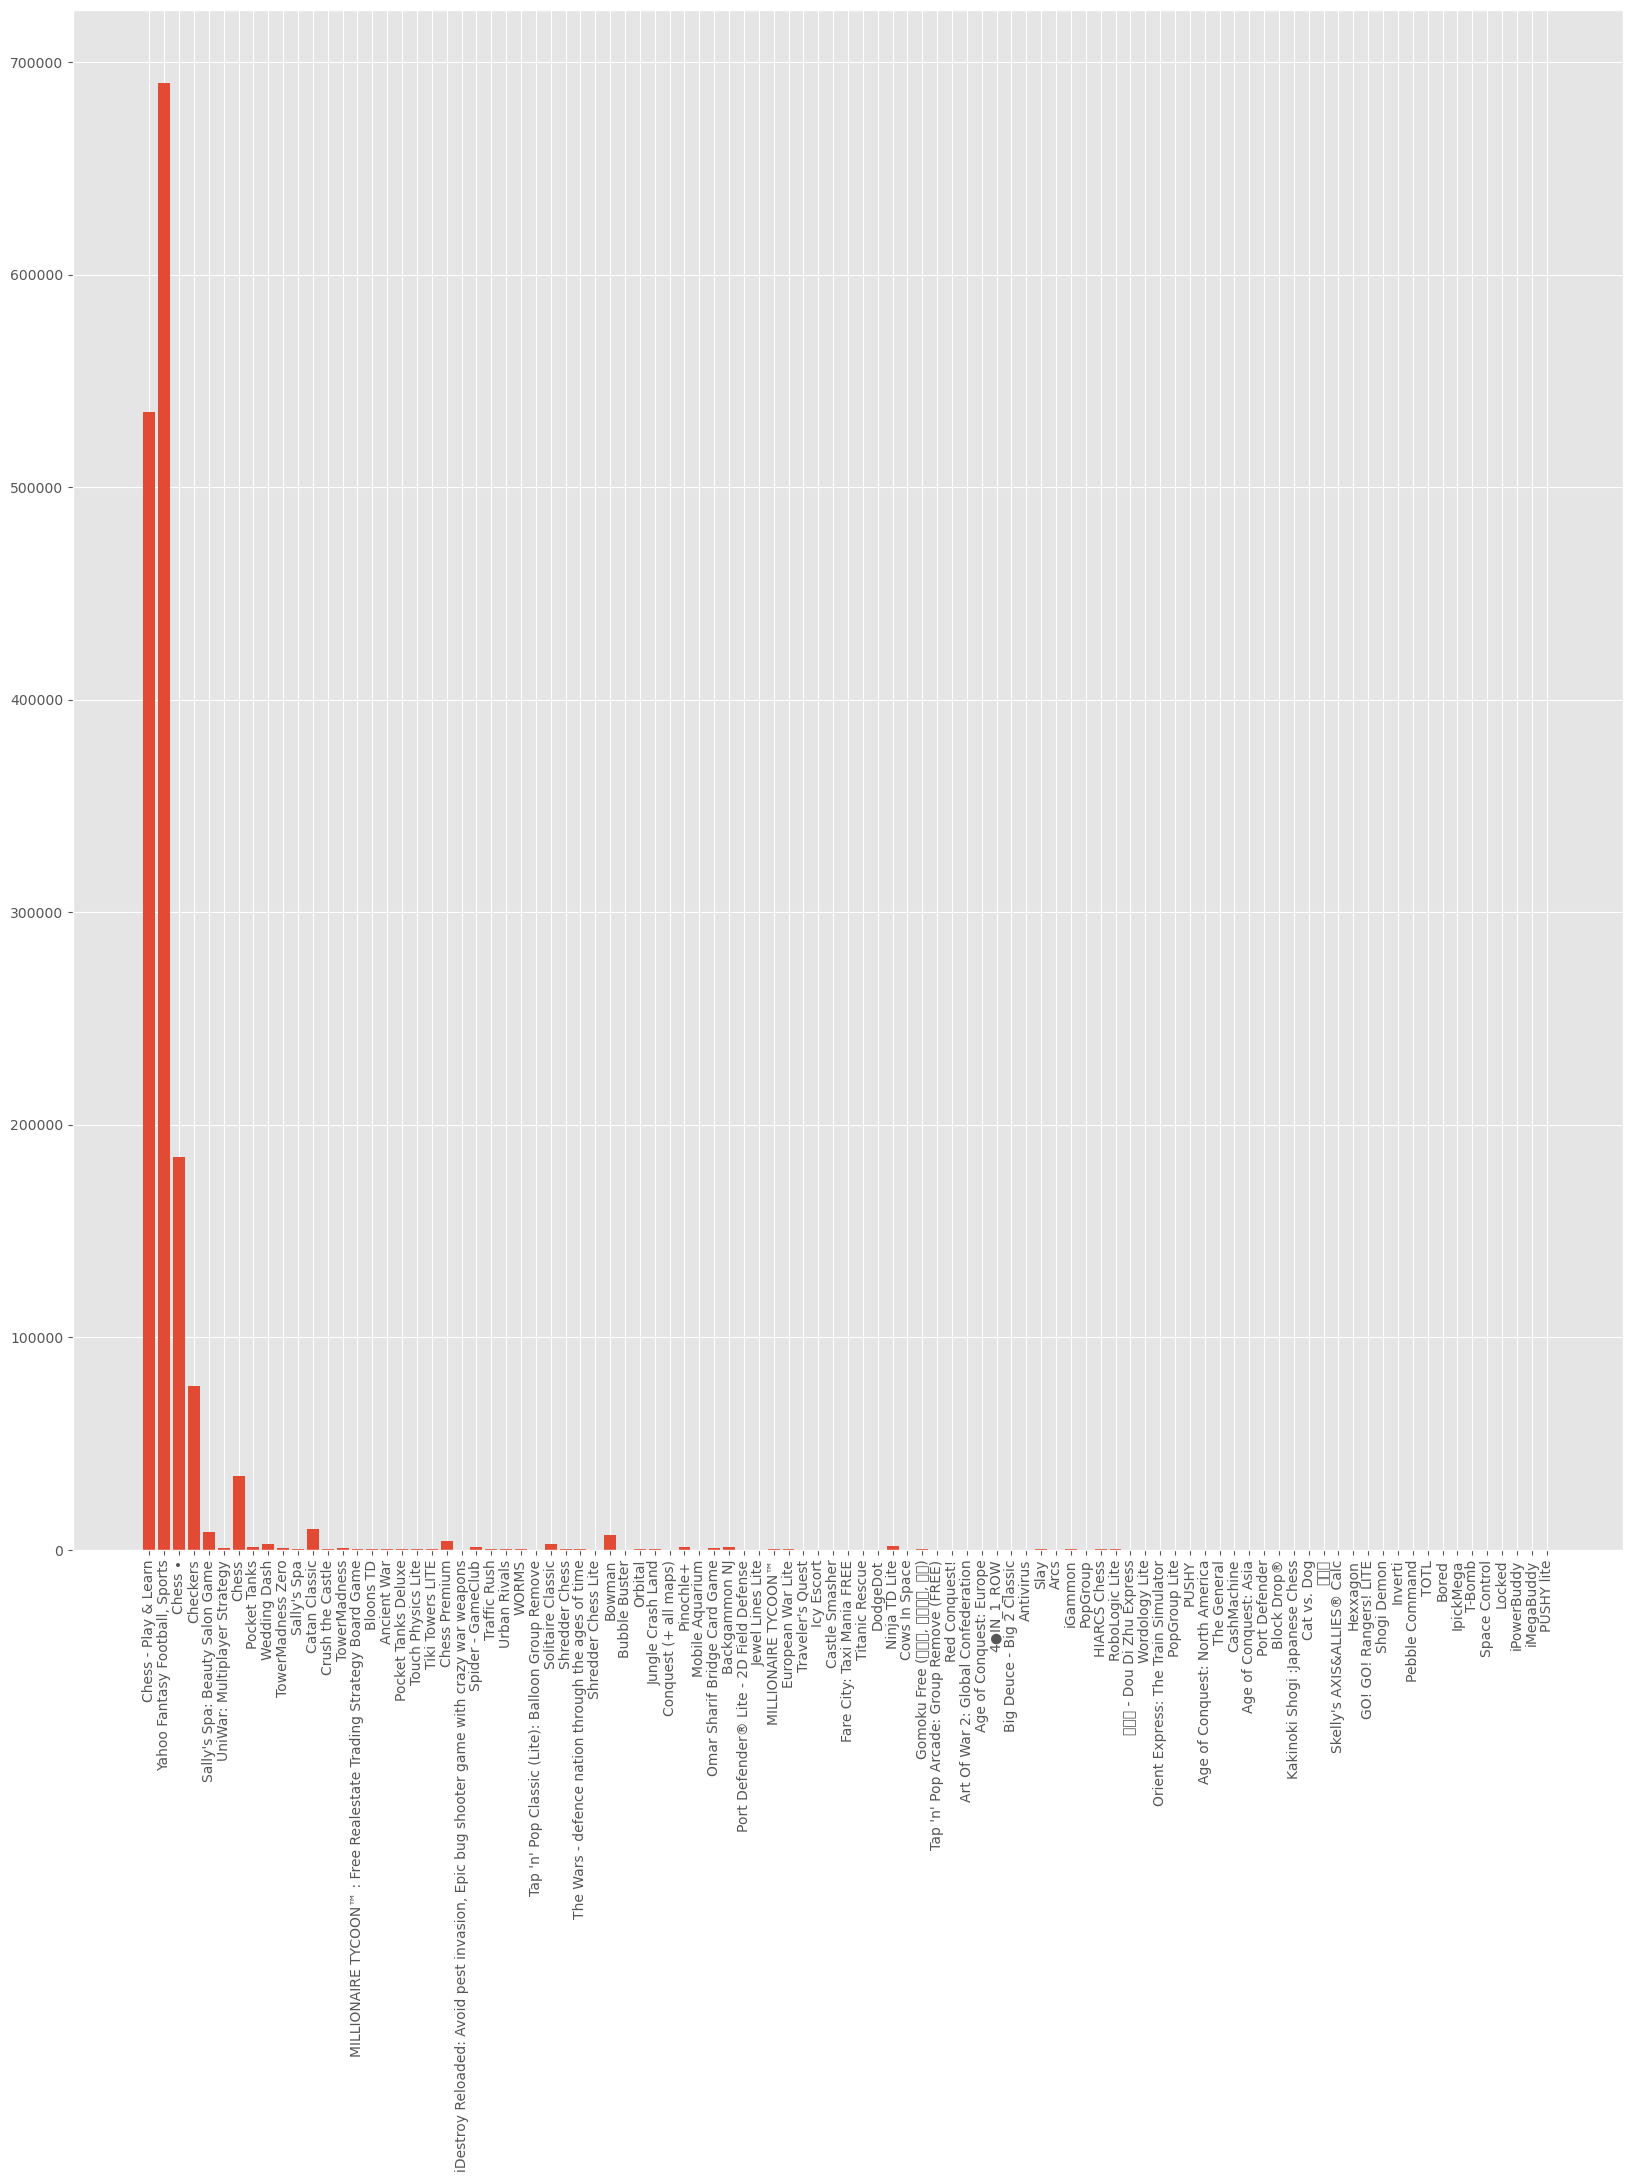

In [103]:
games_2009 = games[games["Year"] == 2009]

X = games_2009["Number of Ratings"]
y = games_2009["App Name"]

plt.subplots(figsize=(20,20))
plt.bar(y,X)
plt.xticks(y, rotation = 90)
plt.show()

**Your interpretation**: TODO

I also plotted the number of games to see whether that will be a factor for the flucuation of the number of ratings in the earlier years. I found that during the year where there's a bigger dip in the average number of rating, there's a higher increase for the number of paid games. With more paid games, there could be a potential that less people are willing to explore the game field and thus left less reviews. 

Another reason is that games didn't get popular until the 2010s. I plotted the number of ratings for each games for 2009 which had a huge spike. We can see a big outlier which is a very popular games. This could happen for some of the earlier year which can skew the data.

I plotted the average number of ratings per year for all the games and then I drew a line at 200 which is our previuos threadshold for major games. We can see that all the every year has a average number of ratings higher than 200. So, I don't think 200 is a very accurate threashold for us to pick out the major games. I would choose another threadshold that's maybe the average of average of the number of rating per year to reflect the entire dataset. 

## Task 3 Reflecting

Succinctly describe what you referenced to help you do the assignment and what the biggest challenges were.

I think the most difficult thing for me throughout the assignment is the syntax. Often time I understood the logic and know what we need to do to the data but I am not sure how to transform the thoughts into python code. For example, I know I want to groupby the dataframe with a certain column and then get the value count for each categories. However, I need to search up the syntax for groupby and sort_values function. 